# Goals
- Measure students' performance based on their hours studied, previous scores, participation in extracurricular activities, sleep hours, and the number of sample question papers practiced using Scikit-Learn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
np.set_printoptions(precision=2)

# Gradient Descent

### Load the data set

In [2]:
f = pd.read_csv('data/train_multi.csv')

In [3]:
# Separate the independent variables (features)
X_train = np.array(f[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']])
# Separate the dependent variable (target)
y_train = np.array(f['Performance Index'])

### Scale/normalize the training data

In [4]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[ 8 59  5  9]
Peak to Peak range by column in Normalized X:[3.03 3.49 2.75 3.15]


### Create and fit the regression model

In [5]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

number of iterations completed: 31, number of weight updates: 4837.0


### View parameters

In [6]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:w: {w_norm}, b:{b_norm}")

model parameters:w: [ 7.68 17.18  0.83  0.72], b:[56.84]


### Make predictions

In [7]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)

### Plot Results
Let's plot the predictions versus the target values.

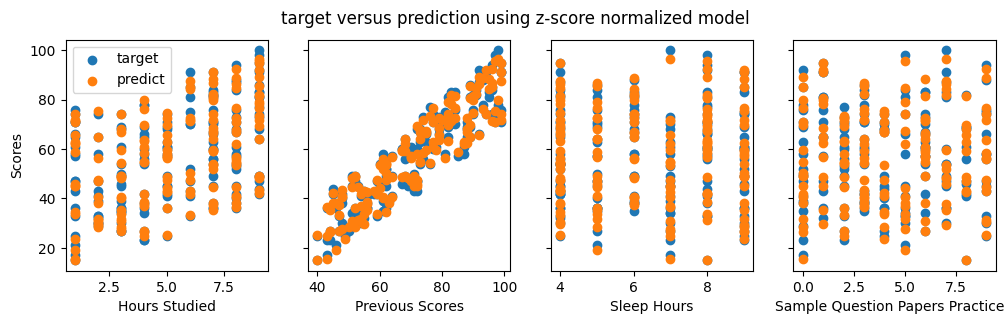

In [8]:
 fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(f.columns[i])
    ax[i].scatter(X_train[:,i],y_pred_sgd, label = 'predict')
ax[0].set_ylabel("Scores"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

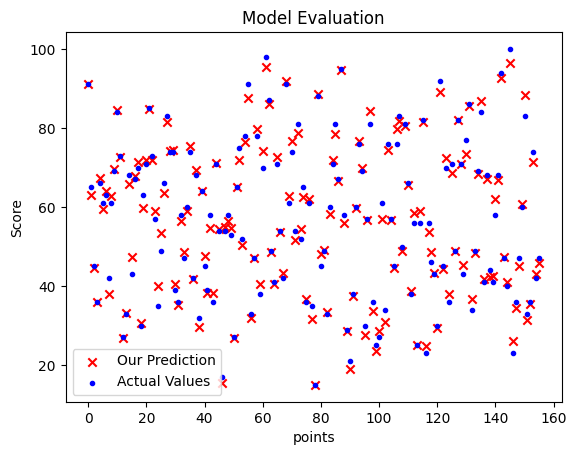

In [9]:
pts_norm = np.arange(len(y_train))
# Plot our model prediction
plt.scatter(pts_norm, y_pred_sgd, marker='x', c='r',label='Our Prediction')
# Plot the data points
plt.scatter(pts_norm, y_train, marker='.', c='b',label='Actual Values')
# Set the title
plt.title("Model Evaluation")
# Set the y-axis label
plt.ylabel('Score')
# Set the x-axis label
plt.xlabel('points')
plt.legend()
plt.show()

In [10]:
# Evaluate The mean Squared Error
mse = mean_squared_error(y_train, y_pred_sgd)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3.6890075725639773
